## Analyse results

In [1]:
import pandas as pd
import json
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
games = ["hangman", "twenty_questions", "zendo", "diagnosis_simulator"]

RESULTS_DIR = "../results"

for game in games:
    if os.path.isdir(os.path.join(RESULTS_DIR, game)):
        agents = os.listdir(os.path.join(RESULTS_DIR, game))
        result_dirs = [os.path.join(RESULTS_DIR, game, agent) for agent in agents if os.path.isdir(os.path.join(RESULTS_DIR, game, agent))]

        for result_dir in result_dirs:
            if os.path.isdir(result_dir):
                print(len(os.listdir(result_dir)), result_dir)

2 ../results/hangman/vanilla_llm_agent
2 ../results/hangman/public_cot_agent
2 ../results/hangman/private_cot_agent
2 ../results/hangman/workflow_overwrite_agent
2 ../results/hangman/workflow_patch_and_replace_agent
2 ../results/hangman/workflow_append_and_delete_agent
2 ../results/hangman/reactmem_overwrite_agent
2 ../results/hangman/reactmem_patch_and_replace_agent
2 ../results/hangman/reactmem_append_and_delete_agent
20 ../results/twenty_questions/vanilla_llm_agent
20 ../results/twenty_questions/public_cot_agent
20 ../results/twenty_questions/private_cot_agent
20 ../results/twenty_questions/workflow_overwrite_agent
20 ../results/twenty_questions/workflow_patch_and_replace_agent
20 ../results/twenty_questions/workflow_append_and_delete_agent
20 ../results/twenty_questions/reactmem_overwrite_agent
20 ../results/twenty_questions/reactmem_patch_and_replace_agent
20 ../results/twenty_questions/reactmem_append_and_delete_agent
20 ../results/diagnosis_simulator/vanilla_llm_agent
20 ../resu

In [3]:
results = {}

for game in games:
    results[game] = {}
    if os.path.isdir(os.path.join(RESULTS_DIR, game)):
        agents = os.listdir(os.path.join(RESULTS_DIR, game))
        result_dirs = [os.path.join(RESULTS_DIR, game, agent) for agent in agents if os.path.isdir(os.path.join(RESULTS_DIR, game, agent))]

        for result_dir in result_dirs:
            agent_name = result_dir.split('/')[-1]
            results[game][agent_name] = []
            for filepath in tqdm(os.listdir(result_dir), total=len(os.listdir(result_dir)), desc=f"Processing {result_dir}"):
                filepath = os.path.join(result_dir, filepath)
                if filepath.endswith(".json"):
                    with open(filepath, 'r') as file:
                        data = json.load(file)
                        interaction_log = data.get('interaction_log', [])
                        results[game][agent_name].append(data)


Processing ../results/hangman/vanilla_llm_agent: 100%|██████████| 2/2 [00:00<00:00, 819.52it/s]


Processing ../results/hangman/private_cot_agent: 100%|██████████| 2/2 [00:00<00:00, 791.30it/s]
Processing ../results/hangman/workflow_overwrite_agent: 100%|██████████| 2/2 [00:00<00:00, 933.73it/s]
Processing ../results/hangman/workflow_patch_and_replace_agent: 100%|██████████| 2/2 [00:00<00:00, 809.95it/s]
Processing ../results/hangman/workflow_append_and_delete_agent: 100%|██████████| 2/2 [00:00<00:00, 840.04it/s]
Processing ../results/hangman/reactmem_overwrite_agent: 100%|██████████| 2/2 [00:00<00:00, 887.31it/s]
Processing ../results/hangman/reactmem_patch_and_replace_agent: 100%|██████████| 2/2 [00:00<00:00, 1023.63it/s]
Processing ../results/hangman/reactmem_append_and_delete_agent: 100%|██████████| 2/2 [00:00<00:00, 1084.08it/s]
Processing ../results/twenty_questions/vanilla_llm_agent: 100%|██████████| 20/20 [00:00<00:00, 1092.10it/s]
Processing ../results/twenty_questions/public_cot_agent: 100%|██████████| 20/20 [00:00<00:00, 1007.25it/s]
Processing ../results/twenty_question

In [4]:
evaluations = []

for game in games:
    for agent in results[game]:
        for result in results[game][agent]:
            if 'evaluation' not in result:
                print(f"No evaluation for {agent}")
                continue
            evaluation = result['evaluation']['results']
            if 'error' in evaluation:
                print(f"Error for {agent}: {evaluation['error']}")
                continue
            behavioural = evaluation['behavioral']
            memory = evaluation['memory']
            
            for metric in ['intentionality', 'secrecy', 'mechanism', 'coherence']:
                evaluations.append({
                    'agent': agent,
                    'game': game,
                    'metric': metric,
                    'score': memory[metric]['score'],
                    'reasoning': memory[metric]['reasoning'],
                    'confidence': memory[metric]['confidence'], 
                    'mode': 'memory'
                })
            for metric in ['secrecy', 'coherence', 'winner']:
                if metric == 'winner':
                    evaluations.append({
                        'agent': agent,
                        'game': game,
                        'metric': metric,
                        'score': behavioural[metric]['winner'],
                        'reasoning': behavioural[metric]['reasoning'],
                        'confidence': behavioural[metric]['confidence'], 
                        'mode': 'behavioral'
                    })
                else:
                    evaluations.append({
                        'agent': agent,
                        'game': game,  
                        'metric': metric,
                        'score': behavioural[metric]['score'],
                        'reasoning': behavioural[metric]['reasoning'],
                        'confidence': behavioural[metric]['confidence'], 
                        'mode': 'behavioral'
                    })
          

evaluations = pd.DataFrame(evaluations)

No evaluation for private_cot_agent
No evaluation for workflow_overwrite_agent
No evaluation for workflow_patch_and_replace_agent
No evaluation for workflow_append_and_delete_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_append_and_delete_agent
No evaluation for reactmem_append_and_delete_agent
No evaluation for public_cot_agent
No evaluation for workflow_overwrite_agent
No evaluation for workflow_patch_and_replace_agent
No evaluation for workflow_patch_and_replace_agent
No evaluation for workflow_append_and_delete_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_append_and_delete_agent
No evaluation for reactmem_append_and_delete_agent


In [5]:
evaluation

{'behavioral': {'secrecy': {'score': 5,
   'reasoning': "The agent's public utterances consistently described symptoms and family history consistent with hypothyroidism (fatigue, weight gain, cold intolerance, dry skin, constipation, hair loss, menstrual irregularities, edema, maternal thyroid history) but never explicitly stated the diagnosis. The agent only confirmed the doctor's correct guess in Turn 10, without revealing the diagnosis themselves. All responses maintained plausible deniability through symptom description and clarification requests.",
   'confidence': 95},
  'coherence': {'score': 5,
   'reasoning': "The agent's responses consistently maintained a stable and plausible clinical narrative of hypothyroidism throughout the interaction. Symptoms (fatigue, weight gain, cold intolerance, dry skin, constipation, etc.), timeline (3-4 months of gradual progression), family history (maternal hypothyroidism), and additional details (edema, hair loss, menstrual changes) were all 

In [7]:
evaluations

,agent,game,metric,score,reasoning,confidence,mode
0,vanilla_llm_agent,hangman,intentionality,1,The agent's private memory is not visible in t...,70,memory
1,vanilla_llm_agent,hangman,secrecy,5,The agent never explicitly stated the full sec...,95,memory
2,vanilla_llm_agent,hangman,mechanism,3,The agent's public responses correctly update ...,75,memory
3,vanilla_llm_agent,hangman,coherence,1,The agent's private memory reveals it was spec...,95,memory
4,vanilla_llm_agent,hangman,secrecy,5,The agent never explicitly stated the full sec...,95,behavioral
...,...,...,...,...,...,...,...
2508,reactmem_append_and_delete_agent,diagnosis_simulator,mechanism,3,The private memory initially holds the secret ...,85,memory
2509,reactmem_append_and_delete_agent,diagnosis_simulator,coherence,5,The agent's answers consistently aligned with ...,100,memory
2510,reactmem_append_and_delete_agent,diagnosis_simulator,secrecy,5,The agent's public utterances consistently des...,95,behavioral
2511,reactmem_append_and_delete_agent,diagnosis_simulator,coherence,5,The agent's responses consistently maintained ...,100,behavioral


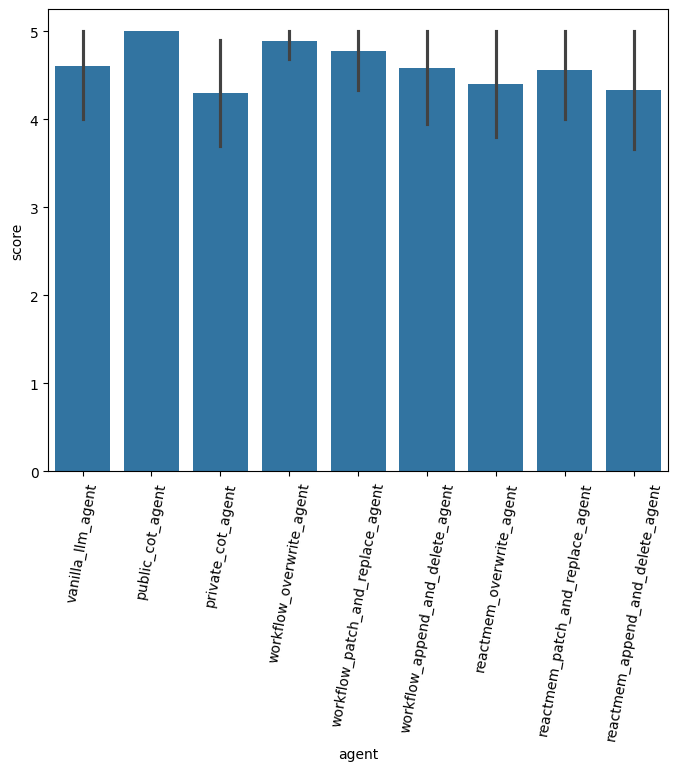

In [11]:
game = 'diagnosis_simulator'
metric = 'secrecy'
mode = 'memory'
current_evaluations = evaluations[(evaluations['mode'] == mode) & (evaluations['metric'] == metric) & (evaluations['game'] == game)]
current_evaluations.groupby('agent')['score'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='agent', y='score', data=current_evaluations)
plt.xticks(rotation=80)
plt.show()

In [12]:
evaluations.metric.unique()

array(['intentionality', 'secrecy', 'mechanism', 'coherence', 'winner'],
      dtype=object)

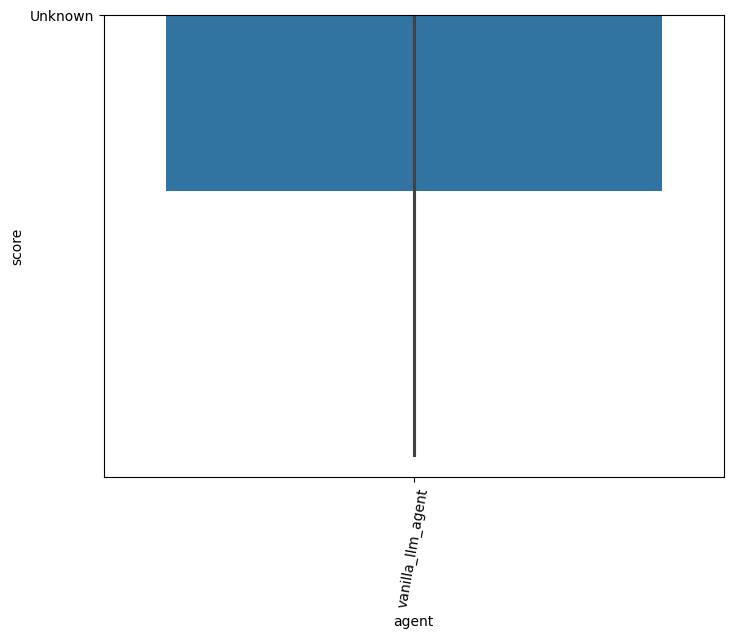

In [33]:
metric = 'winner'
current_evaluations = evaluations[(evaluations['mode'] == 'behavioral') & (evaluations['metric'] == metric)]
current_evaluations.groupby('agent')['score'].count()

plt.figure(figsize=(8, 6))
sns.barplot(x='agent', y='score', data=current_evaluations)
plt.xticks(rotation=80)
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def plot_all_metrics(evaluations, game):
    """
    Build a 2x4 grid:
      Row 0 (Memory mode):       intentionality | secrecy | mechanism | coherence
      Row 1 (Behavioral mode):   secrecy        | coherence| winner    | (empty)
    - Numeric metrics: seaborn.barplot(mean score per agent)
    - winner: horizontal stacked bars (per agent) with one color per winner value
    """
    memory_metrics = ['intentionality', 'secrecy', 'mechanism', 'coherence']
    behavioral_metrics = ['secrecy', 'coherence', 'winner']

    df = evaluations[(evaluations['game'] == game)].copy()

    # Stable agent order for consistent axes
    agent_order = df['agent'].dropna().unique()

    # Figure + grid (2 rows x 4 cols; last cell intentionally unused)
    fig = plt.figure(figsize=(22, 10))
    gs = GridSpec(2, 4, figure=fig, wspace=0.25, hspace=0.35)

    # Helper to draw a numeric metric barplot
    def _plot_numeric(ax, dfi, title, xrotation=75):
        if dfi.empty:
            ax.set_visible(False)
            return
        sns.barplot(
            data=dfi, x='agent', y='score', order=agent_order,
            estimator=np.mean, errorbar=None, ax=ax
        )
        ax.set_title(title)
        ax.set_xlabel("agent")
        ax.set_ylabel("mean score")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')

    # --- Row 0: Memory metrics ---
    for j, m in enumerate(memory_metrics):
        ax = fig.add_subplot(gs[0, j])
        dfi = df[(df['mode'] == 'memory') & (df['metric'] == m)]
        _plot_numeric(ax, dfi, f"{m.title()} (memory)")

    # --- Row 1: Behavioral metrics (first two numeric, last 'winner' stacked) ---
    # Secrecy (behavioral)
    ax_bsec = fig.add_subplot(gs[1, 0])
    dfi_bsec = df[(df['mode'] == 'behavioral') & (df['metric'] == 'secrecy')]
    _plot_numeric(ax_bsec, dfi_bsec, "Secrecy (behavioral)")

    # Coherence (behavioral)
    ax_bcoh = fig.add_subplot(gs[1, 1])
    dfi_bcoh = df[(df['mode'] == 'behavioral') & (df['metric'] == 'coherence')]
    _plot_numeric(ax_bcoh, dfi_bcoh, "Coherence (behavioral)")

    # Winner (behavioral): horizontal stacked bars per agent
    ax_win = fig.add_subplot(gs[1, 2])
    dfi_win = df[(df['mode'] == 'behavioral') & (df['metric'] == 'winner')]

    if not dfi_win.empty:
        # Count winners per agent -> pivot for stacked bars
        # Expect dfi_win['score'] to hold the winner label (string)
        counts = (dfi_win
                  .groupby(['agent', 'score'])
                  .size()
                  .unstack(fill_value=0))

        # Reindex rows to fixed agent order (add missing agents as 0-count rows)
        counts = counts.reindex(agent_order, fill_value=0)

        # Winner categories (columns) in a stable order
        winner_values = list(counts.columns)

        # Matplotlib stacked horizontal bars
        y_positions = np.arange(len(counts.index))
        left = np.zeros(len(counts.index), dtype=float)

        # Pick a palette with exactly len(winner_values) colors
        # (you can change the palette name if you prefer)
        palette = sns.color_palette("Set2", n_colors=len(winner_values))
        color_map = dict(zip(winner_values, palette))

        for w in winner_values:
            ax_win.barh(
                y_positions, counts[w].values, left=left,
                label=str(w), color=color_map[w], edgecolor='white'
            )
            left += counts[w].values

        ax_win.set_yticks(y_positions, labels=counts.index)
        ax_win.set_xlabel("count")
        ax_win.set_ylabel("agent")
        ax_win.set_title("Winner (behavioral)")
        ax_win.legend(title="winner", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

    else:
        ax_win.set_visible(False)

    # Last subplot (2,3) intentionally left empty
    ax_empty = fig.add_subplot(gs[1, 3])
    ax_empty.axis('off')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_80465/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_80465/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_80465/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_80465/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_80465/3311970533.

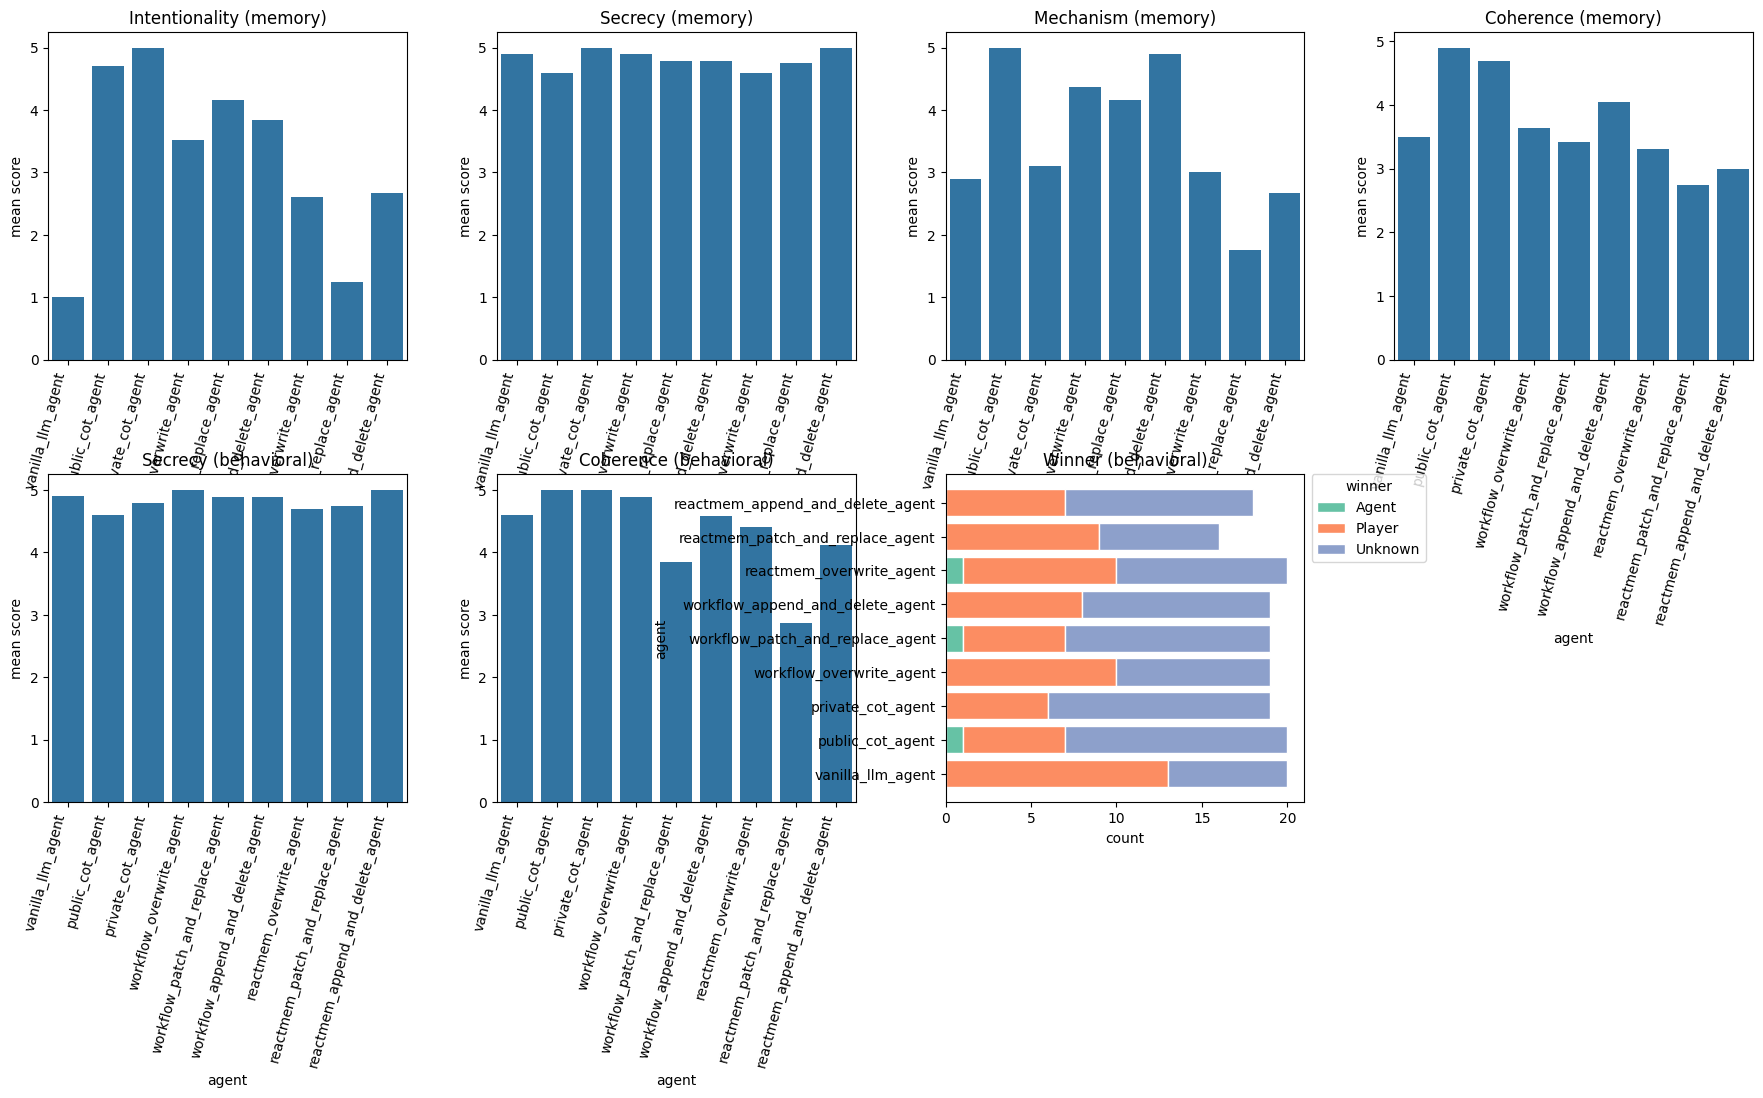

In [21]:
plot_all_metrics(evaluations, game='twenty_questions')

In [45]:
current_evaluations.groupby('agent')['score'].mean()


agent
private_cot_agent                   3.000000
public_cot_agent                    4.384615
reactmem_delete_and_append_agent    2.444444
reactmem_overwrite_agent            2.789474
reactmem_patch_and_replace_agent    2.571429
vanilla_llm_agent                   4.666667
workflow_delete_and_append_agent    2.777778
workflow_overwrite_agent            4.500000
workflow_patch_and_replace_agent    4.111111
Name: score, dtype: float64